## Datos

In [7]:
yp <-c(6.40, 15.05, 18.75, 30.25, 44.85, 48.85, 51.55, 61.50, 100.44, 111.42)
x1 <-c(1.32, 2.69, 3.56, 4.41, 5.35, 6.20, 7.12, 8.87, 9.80, 10.65)
x2 <-c(1.15, 3.40, 4.10, 8.75, 14.82, 15.15, 15.32, 18.18, 35.19, 40.40)
datos<-data.frame(yp, x1, x2)
# kable(datos, caption = "Factores que influyen en el tiempo de coccion segun diferentes niveles de ancho del horno y diferentes temperaturas")

head(datos)

,yp,x1,x2
,<dbl>,<dbl>,<dbl>
1,6.40,1.32,1.15
2,15.05,2.69,3.40
3,18.75,3.56,4.10
4,30.25,4.41,8.75
5,44.85,5.35,14.82
6,48.85,6.20,15.15


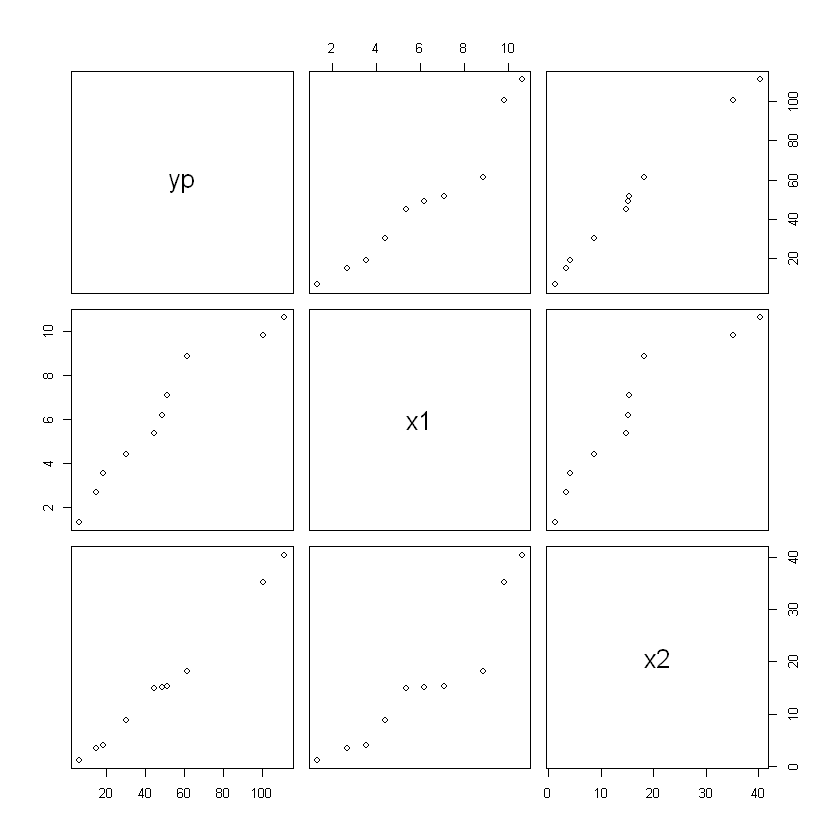

In [5]:
pairs(datos)

## Modelos

In [11]:
LinearModel_1 = lm("yp ~ x1 + x2",datos)
summary(LinearModel_1)


Call:
lm(formula = "yp ~ x1 + x2", data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8475 -0.3438  0.0043  0.2554  1.1578 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.57723    0.59865   0.964    0.367    
x1           2.70957    0.19935  13.592 2.75e-06 ***
x2           2.05033    0.04743  43.227 9.26e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6481 on 7 degrees of freedom
Multiple R-squared:  0.9997,	Adjusted R-squared:  0.9997 
F-statistic: 1.304e+04 on 2 and 7 DF,  p-value: 3.166e-13


In [12]:
LinearModel_2 = lm("yp ~ x1",datos)
summary(LinearModel_2)


Call:
lm(formula = "yp ~ x1", data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4027  -3.4590   0.1446   6.6966  12.3129 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -15.795      7.098  -2.225   0.0567 .  
x1            10.789      1.062  10.162 7.53e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.923 on 8 degrees of freedom
Multiple R-squared:  0.9281,	Adjusted R-squared:  0.9191 
F-statistic: 103.3 on 1 and 8 DF,  p-value: 7.529e-06


Prueba de Significancia en Modelos
H_0 : Las variables eliminadas no son significativas
H_1 : Las variables eliminadas son significativas

In [13]:
anova(LinearModel_1,LinearModel_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,2.940098,NA,NA,NA,NA
2,8,787.776986,-1,-784.8369,1868.597,9.255893e-10


In [15]:
LinearModel_3 = lm("yp ~ x1 + x2 - 1",datos)
summary(LinearModel_3)


Call:
lm(formula = "yp ~ x1 + x2 - 1", data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8103 -0.3698  0.1963  0.3955  1.1807 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
x1  2.87003    0.10927   26.27 4.74e-09 ***
x2  2.02140    0.03657   55.28 1.27e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6452 on 8 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 4.188e+04 on 2 and 8 DF,  p-value: < 2.2e-16


## Normalidad

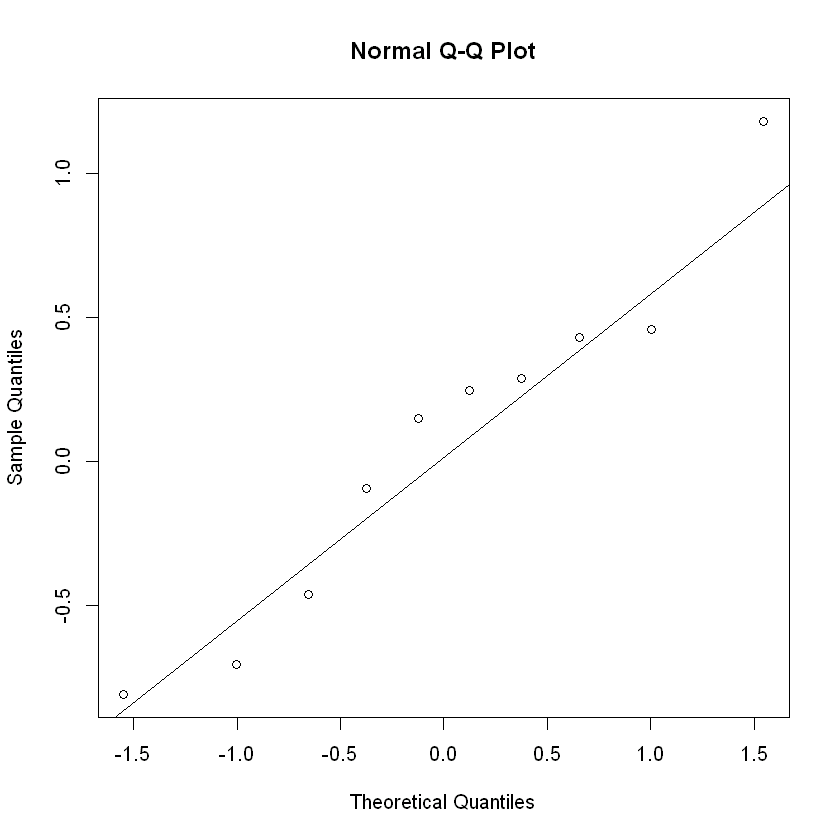

In [21]:
qqnorm(LinearModel_3$residuals)
qqline(LinearModel_3$residuals)

Prueba de normalidad Shapiro-Wilks
H_0: distribución normal
H_1: distribución no normal

In [25]:
shapiro.test(LinearModel_3$residuals)


	Shapiro-Wilk normality test

data:  LinearModel_3$residuals
W = 0.95058, p-value = 0.6754


## Homocedasticidad

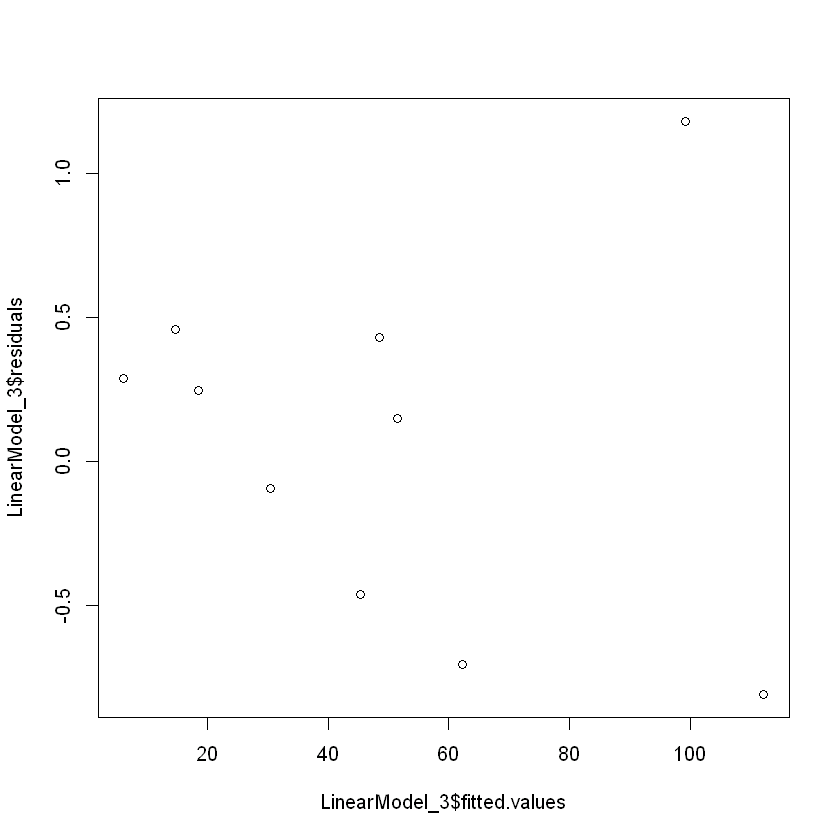

In [28]:
plot(LinearModel_3$fitted.values,LinearModel_3$residuals)

H_0 : Los residuos tienen varianza constante (Homocedasticidad)

H_1 : Los residuos son heterocedasticos

In [31]:
library(lmtest)
# Breaush-Pagan
bptest(LinearModel_3)


	studentized Breusch-Pagan test

data:  LinearModel_3
BP = 5.7517, df = 1, p-value = 0.01647


In [32]:
LinearModel_4 <- lm("yp ~ log(x1) + x2 - 1",datos)
summary(LinearModel_4)


Call:
lm(formula = "yp ~ log(x1) + x2 - 1", data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4546 -0.7961 -0.3458  0.9207  2.5270 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
log(x1)  7.52724    0.72213   10.42 6.22e-06 ***
x2       2.34013    0.06306   37.11 3.05e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.578 on 8 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9993 
F-statistic:  6997 on 2 and 8 DF,  p-value: 1.065e-13


In [ ]:
bptest(LinearModel_4)


	studentized Breusch-Pagan test

data:  LinearModel_4
BP = 0.13878, df = 1, p-value = 0.7095


In [43]:
# qqplot(LinearModel_4)
# qqline(LinearModel_4$residuals)

## No Autocorrelación

Durbin-Watson

H_0 : No hay autocorrelación en los errores 

H_1 : Hay autocorrelación en los errores 

In [44]:
dwtest(LinearModel_4)


	Durbin-Watson test

data:  LinearModel_4
DW = 1.036, p-value = 0.02046
alternative hypothesis: true autocorrelation is greater than 0


## Predicción

In [50]:
NewData = data.frame(x1 = 2.10, x2 = 3.10)

LinearModel_4$coefficients

log(x1)       x2 
7.527236 2.340128

In [51]:
predict(LinearModel_4,NewData)

1 
12.83914